In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Set device to CUDA if available, else CPU

from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

import random

from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive to access the dataset

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

Mounted at /content/drive


Image shape: 1x28x28

In [ ]:
# Load and process data

with np.load('/content/drive/My Drive/CS539: Handwritten Letter Language Classifier/data/processed/EnglishCharactersNoSplit.npz') as data:
    X_en = data['X']
    y_en = data['y']

with np.load('/content/drive/My Drive/CS539: Handwritten Letter Language Classifier/data/processed/ArabicCharacters.npz') as data:
    X_ar = data['X']
    y_ar = data['y']

with np.load('/content/drive/My Drive/CS539: Handwritten Letter Language Classifier/data/processed/RussianCharacters.npz') as data:
    X_rn = data['X']
    y_rn = data['y']

# Connor's Path
# with np.load('/content/drive/My Drive/School/Senior Year (2023-2024)/Fall Semester/CS539/EnglishCharactersNoSplit.npz') as data:
#   X_en = data['X']
#   y_en = data['y']

# with np.load('/content/drive/My Drive/School/Senior Year (2023-2024)/Fall Semester/CS539/ArabicCharacters.npz') as data:
#   X_ar = data['X']
#   y_ar = data['y']

# with np.load('/content/drive/My Drive/School/Senior Year (2023-2024)/Fall Semester/CS539/RussianCharacters.npz') as data:
#   X_rn = data['X']
#   y_rn = data['y']


en_num_classes = 26 #number of letters to consider
ar_num_classes = 28
rn_num_classes = 33
total_num_classes = en_num_classes + ar_num_classes + rn_num_classes # 87

### SEPERATE ENSEMBLE CNN METHOD ###

X_train_en, X_val_en, y_train_en, y_val_en = train_test_split(X_en, y_en, test_size=0.3, shuffle=True, random_state=24, stratify=y_en)
X_val_en, X_test_en, y_val_en, y_test_en = train_test_split(X_val_en, y_val_en, test_size=0.5, shuffle=True, random_state=24, stratify=y_val_en)

X_train_ar, X_val_ar, y_train_ar, y_val_ar = train_test_split(X_ar, y_ar, test_size=0.3, shuffle=True, random_state=24, stratify=y_ar)
X_val_ar, X_test_ar, y_val_ar, y_test_ar = train_test_split(X_val_ar, y_val_ar, test_size=0.5, shuffle=True, random_state=24, stratify=y_val_ar)

X_train_rn, X_val_rn, y_train_rn, y_val_rn = train_test_split(X_rn, y_rn, test_size=0.3, shuffle=True, random_state=24, stratify=y_rn)
X_val_rn, X_test_rn, y_val_rn, y_test_rn = train_test_split(X_val_rn, y_val_rn, test_size=0.5, shuffle=True, random_state=24, stratify=y_val_rn)

print("----Seperate CNN datasets info:\n\n")

print("--Language EN:\n")
print("X_train_en & y_train_en shape: ", X_train_en.shape, y_train_en.shape)
print("X_val_en & y_val_en shape: ", X_val_en.shape, y_val_en.shape)
print("X_test_en & y_test_en shape: ", X_test_en.shape, y_test_en.shape)

print("\n--Language AR:\n")
print("X_train_ar & y_train_ar shape: ", X_train_ar.shape, y_train_ar.shape)
print("X_val_ar & y_val_ar shape: ", X_val_ar.shape, y_val_ar.shape)
print("X_test_ar & y_test_ar shape: ", X_test_ar.shape, y_test_ar.shape)

print("\n--Language RN:\n")
print("X_train_rn & y_train_rn shape: ", X_train_rn.shape, y_train_rn.shape)
print("X_val_rn & y_val_rn shape: ", X_val_rn.shape, y_val_rn.shape)
print("X_test_rn & y_test_rn shape: ", X_test_rn.shape, y_test_rn.shape)

print("\n\n")

### COMBINED CNN METHOD ###

X = torch.cat((torch.tensor(X_en), torch.tensor(X_ar), torch.tensor(X_rn)))

# make datasets 87 hot for combination
en_zeros = np.array([0.] * (total_num_classes - en_num_classes))
y_en_87_hot = torch.tensor(np.array([np.append(y_en[i], en_zeros) for i in range(len(y_en))])).float()

ar_zeros_front = np.array([0.] * en_num_classes)
ar_zeros_end = np.array([0.] * (total_num_classes - en_num_classes - ar_num_classes))
y_ar_87_hot = torch.tensor(np.array([np.append(np.append(ar_zeros_front, y_ar[i]), ar_zeros_end) for i in range(len(y_ar))])).float()

rn_zeros = np.array([0.] * (total_num_classes - rn_num_classes))
y_rn_87_hot = torch.tensor(np.array([np.append(rn_zeros, y_rn[i]) for i in range(len(y_rn))])).float()

y = torch.cat((y_en_87_hot, y_ar_87_hot, y_rn_87_hot))

print("----Combined CNN dataset info:\n\n")
print("X shape: ", X.shape)
print("y shape: ", y.shape, end='\n\n')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=24, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, shuffle=True, random_state=24, stratify=y_val)

print("X_train & y_train shape: ", X_train.shape, y_train.shape)
print("X_val & y_val shape: ", X_val.shape, y_val.shape)
print("X_test & y_test shape: ", X_test.shape, y_test.shape)

----Seperate CNN datasets info:


--Language EN:

X_train_en & y_train_en shape:  (4781, 28, 28, 1) (4781, 26)
X_val_en & y_val_en shape:  (1025, 28, 28, 1) (1025, 26)
X_test_en & y_test_en shape:  (1025, 28, 28, 1) (1025, 26)

--Language AR:

X_train_ar & y_train_ar shape:  (6102, 28, 28, 1) (6102, 28)
X_val_ar & y_val_ar shape:  (1308, 28, 28, 1) (1308, 28)
X_test_ar & y_test_ar shape:  (1308, 28, 28, 1) (1308, 28)

--Language RN:

X_train_rn & y_train_rn shape:  (9933, 28, 28, 1) (9933, 33)
X_val_rn & y_val_rn shape:  (2128, 28, 28, 1) (2128, 33)
X_test_rn & y_test_rn shape:  (2129, 28, 28, 1) (2129, 33)



----Combined CNN dataset info:


X shape:  torch.Size([29739, 28, 28, 1])
y shape:  torch.Size([29739, 87])

X_train & y_train shape:  torch.Size([20817, 28, 28, 1]) torch.Size([20817, 87])
X_val & y_val shape:  torch.Size([4461, 28, 28, 1]) torch.Size([4461, 87])
X_test & y_test shape:  torch.Size([4461, 28, 28, 1]) torch.Size([4461, 87])


In [ ]:
# create and implement dataset

class LetterDataset(Dataset):
    def __init__(self, dataset, labels):
        self.dataset = dataset
        # Convert one-hot labels to class indices if they are one-hot encoded
        if len(labels.shape) > 1:  # Assuming labels are one-hot encoded if they have more than 1 dimension
            self.labels = np.argmax(labels, axis=1)
        else:
            self.labels = labels

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
        data_tensor = data_tensor.permute(2, 0, 1)
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
        return data_tensor, label_tensor

### SEPERATE ENSEMBLE CNN METHOD ###

# en
db_train_en, db_val_en, db_test_en = LetterDataset(X_train_en, y_train_en), LetterDataset(X_val_en, y_val_en), LetterDataset(X_test_en, y_test_en)

# ar
db_train_ar, db_val_ar, db_test_ar = LetterDataset(X_train_ar, y_train_ar), LetterDataset(X_val_ar, y_val_ar), LetterDataset(X_test_ar, y_test_ar)

# rn
db_train_rn, db_val_rn, db_test_rn = LetterDataset(X_train_rn, y_train_rn), LetterDataset(X_val_rn, y_val_rn), LetterDataset(X_test_rn, y_test_rn)

### COMBINED CNN METHOD ###

db_train, db_val, db_test = LetterDataset(X_train, y_train), LetterDataset(X_val, y_val), LetterDataset(X_test, y_test)

In [ ]:
### SEPERATE ENSEMBLE CNN METHOD ###

# en
model_en = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, en_num_classes)          # Output layer with `num_classes` outputs
)

# ar
model_ar = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, ar_num_classes)          # Output layer with `num_classes` outputs
)

# rn
model_rn = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, rn_num_classes)          # Output layer with `num_classes` outputs
)


### COMBINED CNN METHOD ###

model = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, total_num_classes)       # Output layer with `num_classes` outputs
)

In [ ]:
import tqdm

def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.normal_(m, mean=0.0, std=0.02)
        m.bias.data.fill_(0.0)

# previous init_weights -> too small std & no bias assumptions
# def init_weights(model):
#     for m in model.modules():
#         if isinstance(m, (nn.Conv2d, nn.Linear)):
#             nn.init.normal_(m.weight, mean=0, std=0.005)

def accuracy(pred, labels):
    return (pred.argmax(-1) == labels).float().mean()


@torch.no_grad()
def eval(model, loader):
    accuracies = []
    for images, labels in tqdm.tqdm(loader):
        # Prepare data
        images = images.to(device)
        labels = labels.to(device)

        # Compute predictions, loss and accuracy
        pred = model(images)
        acc = accuracy(pred, labels)
        accuracies.append(acc.detach().item())
    return np.mean(accuracies)

def fit_one_epoch(model, opt, loader):
    losses, accuracies = [], []
    for images, labels in tqdm.tqdm(loader):
        # Prepare data
        images = images.to(device)
        labels = labels.to(device)

        # Compute predictions, loss and accuracy
        pred = model(images)
        l = loss(pred, labels)
        acc = accuracy(pred, labels)

        # Compute gradients and update the model
        opt.zero_grad()
        l.backward()
        opt.step()

        losses.append(l.detach().item())
        accuracies.append(acc.detach().item())
    return np.mean(losses), np.mean(accuracies)


def fit(model, loader_train, loader_test, epochs=10):
    opt = torch.optim.Adam(model.parameters(), lr=0.0005)
    hist_tr_loss, hist_tr_acc, hist_te_acc = [], [], []
    for epoch in range(epochs):
        tr_l, tr_acc = fit_one_epoch(model, opt, loader_train)
        te_acc = eval(model, loader_test)

        print(f"Finished epoch {epoch} of {epochs}: Train Loss = {tr_l:.3f}   Train Acc = {tr_acc:.3f}   Test Acc = {te_acc:.3f}", flush=True)
        hist_tr_loss.append(tr_l)
        hist_tr_acc.append(tr_acc)
        hist_te_acc.append(te_acc)
    return hist_tr_loss, hist_tr_acc, hist_te_acc

100%|██████████| 17/17 [00:00<00:00, 156.06it/s]

Finished epoch 0 of 30: Train Loss = 1.587   Train Acc = 0.556   Test Acc = 0.789



100%|██████████| 17/17 [00:00<00:00, 204.00it/s]

Finished epoch 1 of 30: Train Loss = 0.629   Train Acc = 0.826   Test Acc = 0.865



100%|██████████| 17/17 [00:00<00:00, 195.46it/s]

Finished epoch 2 of 30: Train Loss = 0.398   Train Acc = 0.890   Test Acc = 0.889



100%|██████████| 17/17 [00:00<00:00, 188.61it/s]

Finished epoch 3 of 30: Train Loss = 0.284   Train Acc = 0.923   Test Acc = 0.903



100%|██████████| 17/17 [00:00<00:00, 205.46it/s]

Finished epoch 4 of 30: Train Loss = 0.216   Train Acc = 0.940   Test Acc = 0.907



100%|██████████| 17/17 [00:00<00:00, 148.62it/s]

Finished epoch 5 of 30: Train Loss = 0.177   Train Acc = 0.945   Test Acc = 0.917



100%|██████████| 17/17 [00:00<00:00, 195.00it/s]

Finished epoch 6 of 30: Train Loss = 0.153   Train Acc = 0.954   Test Acc = 0.915



100%|██████████| 17/17 [00:00<00:00, 198.80it/s]

Finished epoch 7 of 30: Train Loss = 0.127   Train Acc = 0.959   Test Acc = 0.926



100%|██████████| 17/17 [00:00<00:00, 194.88it/s]

Finished epoch 8 of 30: Train Loss = 0.111   Train Acc = 0.966   Test Acc = 0.911



100%|██████████| 17/17 [00:00<00:00, 204.02it/s]

Finished epoch 9 of 30: Train Loss = 0.100   Train Acc = 0.970   Test Acc = 0.854



100%|██████████| 17/17 [00:00<00:00, 195.62it/s]

Finished epoch 10 of 30: Train Loss = 0.088   Train Acc = 0.971   Test Acc = 0.857



100%|██████████| 17/17 [00:00<00:00, 234.78it/s]

Finished epoch 11 of 30: Train Loss = 0.067   Train Acc = 0.979   Test Acc = 0.858



100%|██████████| 17/17 [00:00<00:00, 201.37it/s]

Finished epoch 12 of 30: Train Loss = 0.064   Train Acc = 0.978   Test Acc = 0.866



100%|██████████| 17/17 [00:00<00:00, 229.95it/s]

Finished epoch 13 of 30: Train Loss = 0.057   Train Acc = 0.982   Test Acc = 0.917



100%|██████████| 17/17 [00:00<00:00, 235.36it/s]

Finished epoch 14 of 30: Train Loss = 0.055   Train Acc = 0.984   Test Acc = 0.856



100%|██████████| 17/17 [00:00<00:00, 223.20it/s]

Finished epoch 15 of 30: Train Loss = 0.049   Train Acc = 0.986   Test Acc = 0.861



100%|██████████| 17/17 [00:00<00:00, 225.13it/s]

Finished epoch 16 of 30: Train Loss = 0.050   Train Acc = 0.982   Test Acc = 0.913



100%|██████████| 17/17 [00:00<00:00, 224.90it/s]

Finished epoch 17 of 30: Train Loss = 0.050   Train Acc = 0.983   Test Acc = 0.915



100%|██████████| 17/17 [00:00<00:00, 225.87it/s]

Finished epoch 18 of 30: Train Loss = 0.046   Train Acc = 0.982   Test Acc = 0.855



100%|██████████| 17/17 [00:00<00:00, 228.33it/s]

Finished epoch 19 of 30: Train Loss = 0.037   Train Acc = 0.989   Test Acc = 0.863



100%|██████████| 17/17 [00:00<00:00, 224.74it/s]

Finished epoch 20 of 30: Train Loss = 0.033   Train Acc = 0.990   Test Acc = 0.856



100%|██████████| 17/17 [00:00<00:00, 234.47it/s]

Finished epoch 21 of 30: Train Loss = 0.028   Train Acc = 0.991   Test Acc = 0.921



100%|██████████| 17/17 [00:00<00:00, 232.43it/s]

Finished epoch 22 of 30: Train Loss = 0.034   Train Acc = 0.990   Test Acc = 0.856



100%|██████████| 17/17 [00:00<00:00, 176.65it/s]

Finished epoch 23 of 30: Train Loss = 0.026   Train Acc = 0.989   Test Acc = 0.915



100%|██████████| 17/17 [00:00<00:00, 204.53it/s]

Finished epoch 24 of 30: Train Loss = 0.029   Train Acc = 0.990   Test Acc = 0.856



100%|██████████| 17/17 [00:00<00:00, 198.47it/s]

Finished epoch 25 of 30: Train Loss = 0.029   Train Acc = 0.990   Test Acc = 0.858



100%|██████████| 17/17 [00:00<00:00, 198.45it/s]

Finished epoch 26 of 30: Train Loss = 0.028   Train Acc = 0.991   Test Acc = 0.916



100%|██████████| 17/17 [00:00<00:00, 198.13it/s]

Finished epoch 27 of 30: Train Loss = 0.027   Train Acc = 0.992   Test Acc = 0.924



100%|██████████| 17/17 [00:00<00:00, 201.52it/s]

Finished epoch 28 of 30: Train Loss = 0.018   Train Acc = 0.995   Test Acc = 0.860



100%|██████████| 17/17 [00:00<00:00, 219.89it/s]

Finished epoch 29 of 30: Train Loss = 0.019   Train Acc = 0.994   Test Acc = 0.859



100%|██████████| 17/17 [00:00<00:00, 213.83it/s]


Test accuracy: 85.20%


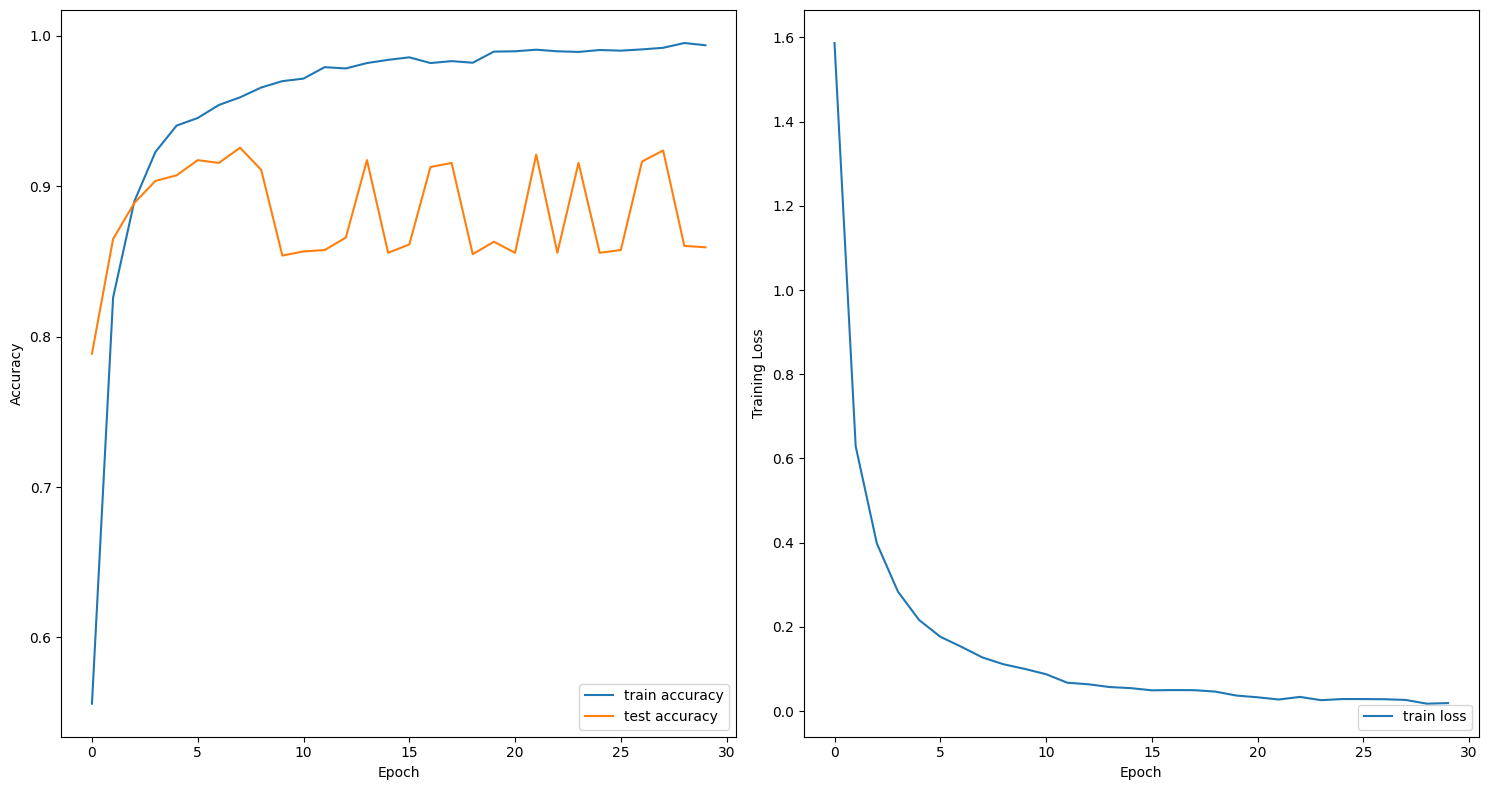

In [ ]:
loss = nn.CrossEntropyLoss()

### SEPERATE ENSEMBLE CNN METHOD ###

# en
db_train_en.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train_en = DataLoader(db_train_en, batch_size=64, shuffle=True, drop_last=True)
loader_test_en = DataLoader(db_test_en, batch_size=64, shuffle=False)
model_en = model_en.to(device).float()
init_weights(model_en)
hist_tr_loss_en, hist_tr_acc_en, hist_te_acc_en = fit(model_en, loader_train_en, loader_test_en, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_en, label='train accuracy')
plt.plot(hist_te_acc_en, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_en, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc = eval(model_en, loader_test_en)
print(f'Test accuracy: {acc*100:.2f}%')

100%|██████████| 21/21 [00:00<00:00, 215.29it/s]

Finished epoch 0 of 30: Train Loss = 4.675   Train Acc = 0.300   Test Acc = 0.434



100%|██████████| 21/21 [00:00<00:00, 241.27it/s]


Finished epoch 1 of 30: Train Loss = 1.620   Train Acc = 0.517   Test Acc = 0.503


100%|██████████| 21/21 [00:00<00:00, 246.94it/s]

Finished epoch 2 of 30: Train Loss = 1.330   Train Acc = 0.588   Test Acc = 0.547



100%|██████████| 21/21 [00:00<00:00, 241.68it/s]

Finished epoch 3 of 30: Train Loss = 1.132   Train Acc = 0.643   Test Acc = 0.563



100%|██████████| 21/21 [00:00<00:00, 239.48it/s]

Finished epoch 4 of 30: Train Loss = 0.936   Train Acc = 0.702   Test Acc = 0.604



100%|██████████| 21/21 [00:00<00:00, 237.77it/s]

Finished epoch 5 of 30: Train Loss = 0.822   Train Acc = 0.731   Test Acc = 0.607



100%|██████████| 21/21 [00:00<00:00, 241.98it/s]

Finished epoch 6 of 30: Train Loss = 0.746   Train Acc = 0.764   Test Acc = 0.629



100%|██████████| 21/21 [00:00<00:00, 238.51it/s]

Finished epoch 7 of 30: Train Loss = 0.648   Train Acc = 0.784   Test Acc = 0.630



100%|██████████| 21/21 [00:00<00:00, 212.70it/s]

Finished epoch 8 of 30: Train Loss = 0.570   Train Acc = 0.813   Test Acc = 0.645



100%|██████████| 21/21 [00:00<00:00, 61.77it/s]

Finished epoch 9 of 30: Train Loss = 0.512   Train Acc = 0.828   Test Acc = 0.639



100%|██████████| 21/21 [00:00<00:00, 198.83it/s]

Finished epoch 10 of 30: Train Loss = 0.486   Train Acc = 0.834   Test Acc = 0.661



100%|██████████| 21/21 [00:00<00:00, 191.63it/s]

Finished epoch 11 of 30: Train Loss = 0.430   Train Acc = 0.855   Test Acc = 0.665



100%|██████████| 21/21 [00:00<00:00, 240.28it/s]

Finished epoch 12 of 30: Train Loss = 0.401   Train Acc = 0.864   Test Acc = 0.676



100%|██████████| 21/21 [00:00<00:00, 240.12it/s]

Finished epoch 13 of 30: Train Loss = 0.365   Train Acc = 0.872   Test Acc = 0.658



100%|██████████| 21/21 [00:00<00:00, 239.05it/s]

Finished epoch 14 of 30: Train Loss = 0.330   Train Acc = 0.885   Test Acc = 0.677



100%|██████████| 21/21 [00:00<00:00, 235.98it/s]

Finished epoch 15 of 30: Train Loss = 0.312   Train Acc = 0.896   Test Acc = 0.700



100%|██████████| 21/21 [00:00<00:00, 241.92it/s]

Finished epoch 16 of 30: Train Loss = 0.256   Train Acc = 0.907   Test Acc = 0.683



100%|██████████| 21/21 [00:00<00:00, 242.12it/s]

Finished epoch 17 of 30: Train Loss = 0.257   Train Acc = 0.913   Test Acc = 0.688



100%|██████████| 21/21 [00:00<00:00, 237.70it/s]

Finished epoch 18 of 30: Train Loss = 0.234   Train Acc = 0.924   Test Acc = 0.701



100%|██████████| 21/21 [00:00<00:00, 238.42it/s]

Finished epoch 19 of 30: Train Loss = 0.220   Train Acc = 0.925   Test Acc = 0.705



100%|██████████| 21/21 [00:00<00:00, 244.67it/s]

Finished epoch 20 of 30: Train Loss = 0.223   Train Acc = 0.919   Test Acc = 0.691



100%|██████████| 21/21 [00:00<00:00, 242.86it/s]

Finished epoch 21 of 30: Train Loss = 0.201   Train Acc = 0.929   Test Acc = 0.712



100%|██████████| 21/21 [00:00<00:00, 197.62it/s]

Finished epoch 22 of 30: Train Loss = 0.196   Train Acc = 0.933   Test Acc = 0.698



100%|██████████| 21/21 [00:00<00:00, 194.30it/s]

Finished epoch 23 of 30: Train Loss = 0.197   Train Acc = 0.935   Test Acc = 0.712



100%|██████████| 21/21 [00:00<00:00, 199.27it/s]

Finished epoch 24 of 30: Train Loss = 0.186   Train Acc = 0.936   Test Acc = 0.708



100%|██████████| 21/21 [00:00<00:00, 198.28it/s]

Finished epoch 25 of 30: Train Loss = 0.159   Train Acc = 0.949   Test Acc = 0.704



100%|██████████| 21/21 [00:00<00:00, 194.30it/s]

Finished epoch 26 of 30: Train Loss = 0.153   Train Acc = 0.952   Test Acc = 0.707



100%|██████████| 21/21 [00:00<00:00, 237.17it/s]

Finished epoch 27 of 30: Train Loss = 0.160   Train Acc = 0.951   Test Acc = 0.703



100%|██████████| 21/21 [00:00<00:00, 232.82it/s]

Finished epoch 28 of 30: Train Loss = 0.138   Train Acc = 0.952   Test Acc = 0.703



100%|██████████| 21/21 [00:00<00:00, 243.48it/s]

Finished epoch 29 of 30: Train Loss = 0.151   Train Acc = 0.950   Test Acc = 0.697



100%|██████████| 21/21 [00:00<00:00, 225.55it/s]


Test accuracy: 70.73%


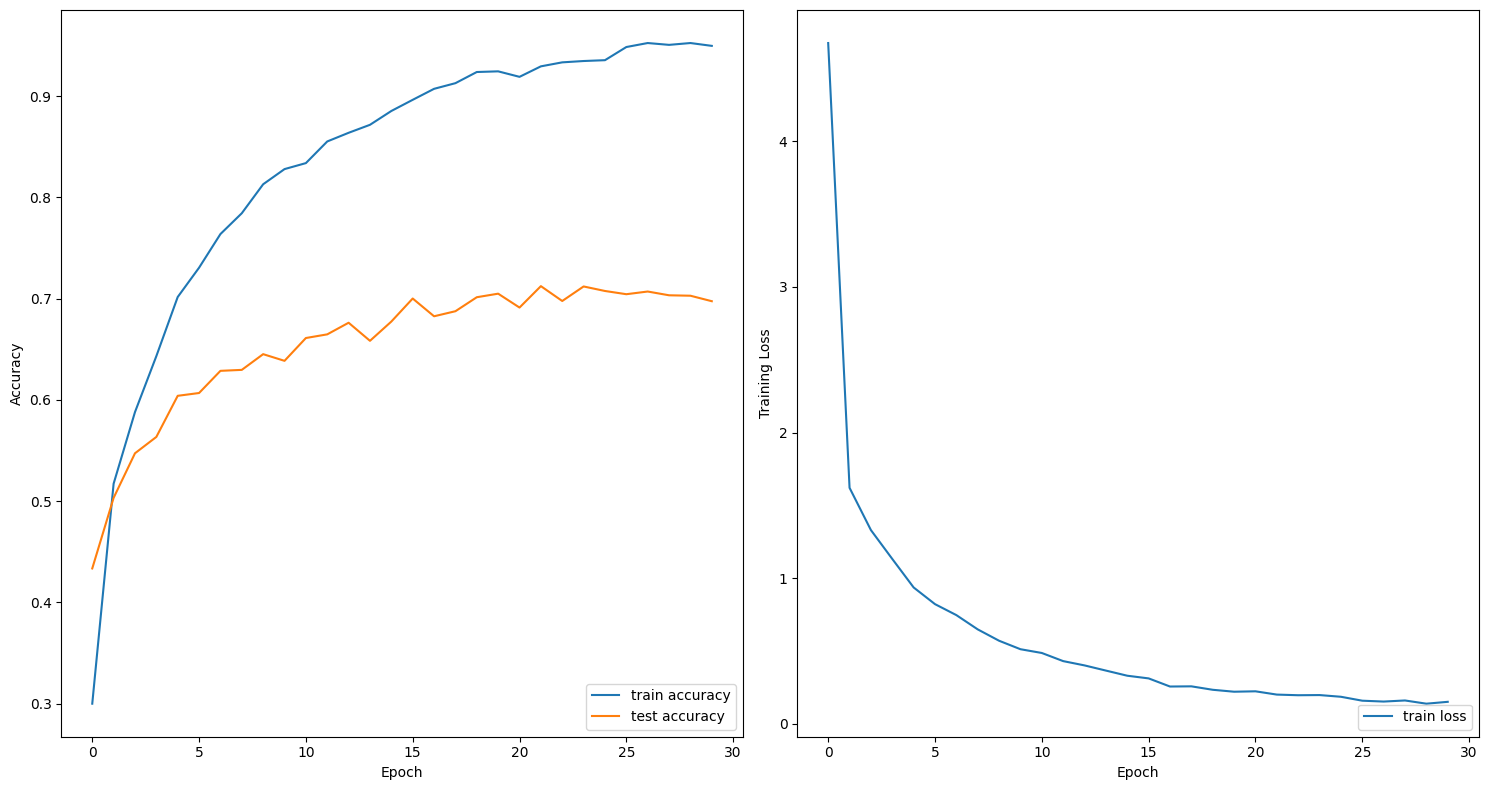

In [ ]:
# ar
db_train_ar.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train_ar = DataLoader(db_train_ar, batch_size=64, shuffle=True, drop_last=True)
loader_test_ar = DataLoader(db_test_ar, batch_size=64, shuffle=False)
model_ar = model_ar.to(device).float()
init_weights(model_ar)
hist_tr_loss_ar, hist_tr_acc_ar, hist_te_acc_ar = fit(model_ar, loader_train_ar, loader_test_ar, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_ar, label='train accuracy')
plt.plot(hist_te_acc_ar, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_ar, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc = eval(model_ar, loader_test_ar)
print(f'Test accuracy: {acc*100:.2f}%')

100%|██████████| 34/34 [00:00<00:00, 218.73it/s]

Finished epoch 0 of 30: Train Loss = 3.404   Train Acc = 0.057   Test Acc = 0.121



100%|██████████| 34/34 [00:00<00:00, 212.25it/s]

Finished epoch 1 of 30: Train Loss = 2.706   Train Acc = 0.263   Test Acc = 0.315



100%|██████████| 34/34 [00:00<00:00, 224.66it/s]

Finished epoch 2 of 30: Train Loss = 2.268   Train Acc = 0.383   Test Acc = 0.407



100%|██████████| 34/34 [00:00<00:00, 223.78it/s]

Finished epoch 3 of 30: Train Loss = 2.030   Train Acc = 0.452   Test Acc = 0.445



100%|██████████| 34/34 [00:00<00:00, 183.00it/s]


Finished epoch 4 of 30: Train Loss = 1.819   Train Acc = 0.505   Test Acc = 0.515


100%|██████████| 34/34 [00:00<00:00, 185.28it/s]

Finished epoch 5 of 30: Train Loss = 1.613   Train Acc = 0.559   Test Acc = 0.552



100%|██████████| 34/34 [00:00<00:00, 194.73it/s]

Finished epoch 6 of 30: Train Loss = 1.462   Train Acc = 0.601   Test Acc = 0.575



100%|██████████| 34/34 [00:00<00:00, 217.03it/s]

Finished epoch 7 of 30: Train Loss = 1.347   Train Acc = 0.633   Test Acc = 0.593



100%|██████████| 34/34 [00:00<00:00, 221.89it/s]

Finished epoch 8 of 30: Train Loss = 1.282   Train Acc = 0.644   Test Acc = 0.575



100%|██████████| 34/34 [00:00<00:00, 224.57it/s]

Finished epoch 9 of 30: Train Loss = 1.192   Train Acc = 0.669   Test Acc = 0.602



100%|██████████| 34/34 [00:00<00:00, 227.27it/s]

Finished epoch 10 of 30: Train Loss = 1.156   Train Acc = 0.681   Test Acc = 0.636



100%|██████████| 34/34 [00:00<00:00, 223.76it/s]

Finished epoch 11 of 30: Train Loss = 1.091   Train Acc = 0.693   Test Acc = 0.627



100%|██████████| 34/34 [00:00<00:00, 219.50it/s]

Finished epoch 12 of 30: Train Loss = 1.039   Train Acc = 0.709   Test Acc = 0.633



100%|██████████| 34/34 [00:00<00:00, 198.13it/s]

Finished epoch 13 of 30: Train Loss = 1.003   Train Acc = 0.721   Test Acc = 0.643



100%|██████████| 34/34 [00:00<00:00, 188.73it/s]

Finished epoch 14 of 30: Train Loss = 0.965   Train Acc = 0.733   Test Acc = 0.655



100%|██████████| 34/34 [00:00<00:00, 222.72it/s]

Finished epoch 15 of 30: Train Loss = 0.925   Train Acc = 0.739   Test Acc = 0.660



100%|██████████| 34/34 [00:00<00:00, 222.69it/s]

Finished epoch 16 of 30: Train Loss = 0.877   Train Acc = 0.750   Test Acc = 0.668



100%|██████████| 34/34 [00:00<00:00, 224.80it/s]

Finished epoch 17 of 30: Train Loss = 0.868   Train Acc = 0.754   Test Acc = 0.670



100%|██████████| 34/34 [00:00<00:00, 223.41it/s]

Finished epoch 18 of 30: Train Loss = 0.837   Train Acc = 0.765   Test Acc = 0.680



100%|██████████| 34/34 [00:00<00:00, 215.27it/s]

Finished epoch 19 of 30: Train Loss = 0.786   Train Acc = 0.774   Test Acc = 0.684



100%|██████████| 34/34 [00:00<00:00, 209.96it/s]

Finished epoch 20 of 30: Train Loss = 0.765   Train Acc = 0.781   Test Acc = 0.685



100%|██████████| 34/34 [00:00<00:00, 187.39it/s]

Finished epoch 21 of 30: Train Loss = 0.735   Train Acc = 0.790   Test Acc = 0.691



100%|██████████| 34/34 [00:00<00:00, 174.15it/s]

Finished epoch 22 of 30: Train Loss = 0.706   Train Acc = 0.793   Test Acc = 0.682



100%|██████████| 34/34 [00:00<00:00, 192.75it/s]

Finished epoch 23 of 30: Train Loss = 0.676   Train Acc = 0.805   Test Acc = 0.697



100%|██████████| 34/34 [00:00<00:00, 223.12it/s]

Finished epoch 24 of 30: Train Loss = 0.668   Train Acc = 0.809   Test Acc = 0.719



100%|██████████| 34/34 [00:00<00:00, 220.68it/s]

Finished epoch 25 of 30: Train Loss = 0.632   Train Acc = 0.817   Test Acc = 0.701



100%|██████████| 34/34 [00:00<00:00, 220.12it/s]

Finished epoch 26 of 30: Train Loss = 0.619   Train Acc = 0.816   Test Acc = 0.703



100%|██████████| 34/34 [00:00<00:00, 222.82it/s]

Finished epoch 27 of 30: Train Loss = 0.611   Train Acc = 0.821   Test Acc = 0.692



100%|██████████| 34/34 [00:00<00:00, 221.93it/s]

Finished epoch 28 of 30: Train Loss = 0.575   Train Acc = 0.834   Test Acc = 0.692



100%|██████████| 34/34 [00:00<00:00, 217.21it/s]

Finished epoch 29 of 30: Train Loss = 0.562   Train Acc = 0.830   Test Acc = 0.696



100%|██████████| 34/34 [00:00<00:00, 206.33it/s]


Test accuracy: 69.61%


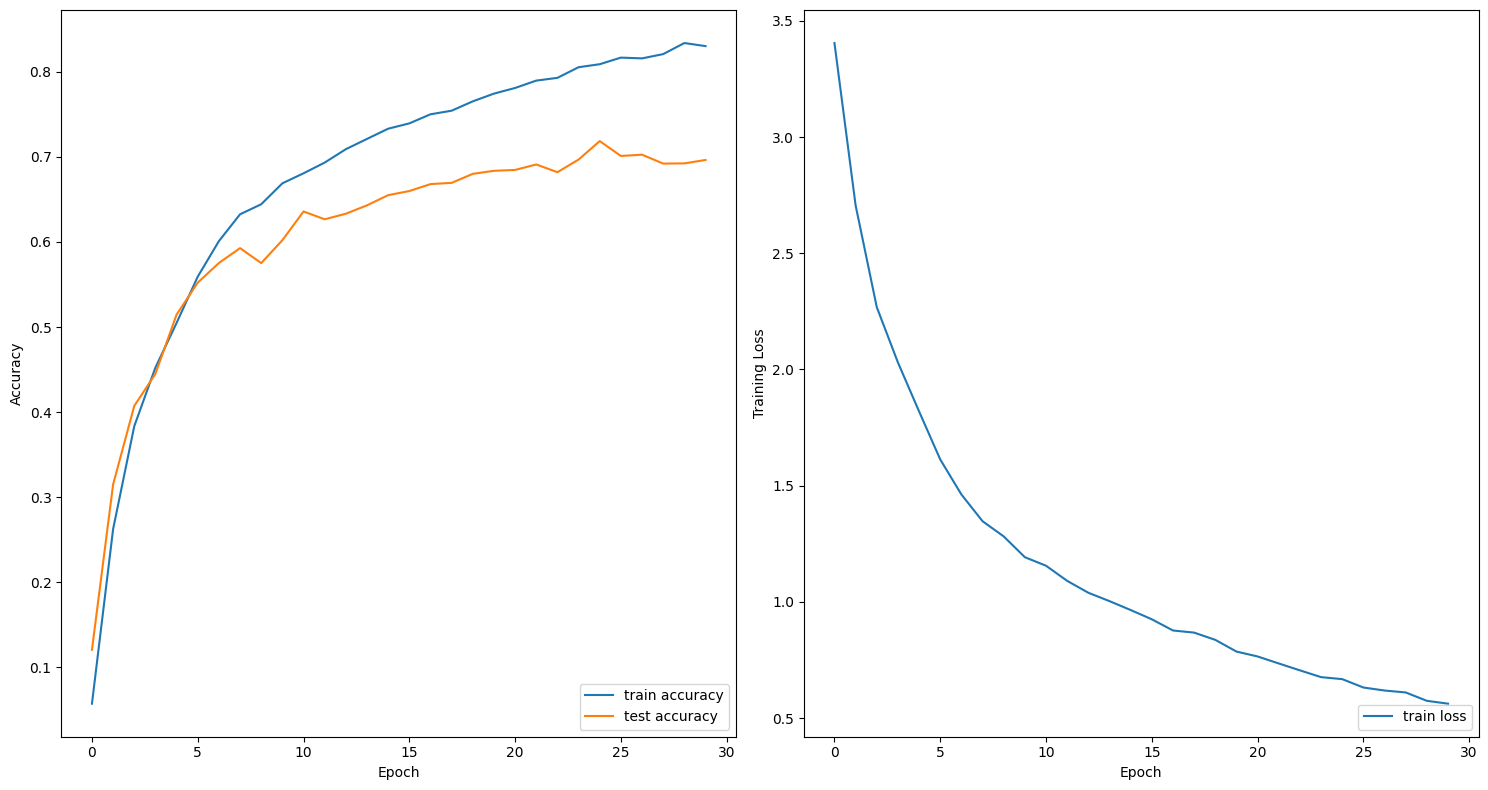

In [ ]:
# rn
db_train_rn.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train_rn = DataLoader(db_train_rn, batch_size=64, shuffle=True, drop_last=True)
loader_test_rn = DataLoader(db_test_rn, batch_size=64, shuffle=False)
model_rn = model_rn.to(device).float()
init_weights(model_rn)
hist_tr_loss_rn, hist_tr_acc_rn, hist_te_acc_rn = fit(model_rn, loader_train_rn, loader_test_rn, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_rn, label='train accuracy')
plt.plot(hist_te_acc_rn, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_rn, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc = eval(model_rn, loader_test_rn)
print(f'Test accuracy: {acc*100:.2f}%')

  0%|          | 0/325 [00:00<?, ?it/s]<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
100%|██████████| 70/70 [00:00<00:00, 158.29it/s]

Finished epoch 0 of 30: Train Loss = 3.185   Train Acc = 0.203   Test Acc = 0.299



100%|██████████| 70/70 [00:00<00:00, 199.31it/s]

Finished epoch 1 of 30: Train Loss = 2.365   Train Acc = 0.342   Test Acc = 0.335



100%|██████████| 70/70 [00:00<00:00, 202.02it/s]

Finished epoch 2 of 30: Train Loss = 2.158   Train Acc = 0.394   Test Acc = 0.405



100%|██████████| 70/70 [00:00<00:00, 192.75it/s]

Finished epoch 3 of 30: Train Loss = 1.900   Train Acc = 0.463   Test Acc = 0.464



100%|██████████| 70/70 [00:00<00:00, 166.03it/s]

Finished epoch 4 of 30: Train Loss = 1.632   Train Acc = 0.535   Test Acc = 0.529



100%|██████████| 70/70 [00:00<00:00, 199.84it/s]

Finished epoch 5 of 30: Train Loss = 1.443   Train Acc = 0.591   Test Acc = 0.552



100%|██████████| 70/70 [00:00<00:00, 193.34it/s]

Finished epoch 6 of 30: Train Loss = 1.337   Train Acc = 0.621   Test Acc = 0.573



100%|██████████| 70/70 [00:00<00:00, 179.90it/s]

Finished epoch 7 of 30: Train Loss = 1.237   Train Acc = 0.651   Test Acc = 0.608



100%|██████████| 70/70 [00:00<00:00, 170.13it/s]

Finished epoch 8 of 30: Train Loss = 1.147   Train Acc = 0.676   Test Acc = 0.618



100%|██████████| 70/70 [00:00<00:00, 189.42it/s]

Finished epoch 9 of 30: Train Loss = 1.038   Train Acc = 0.708   Test Acc = 0.647



100%|██████████| 70/70 [00:00<00:00, 193.39it/s]

Finished epoch 10 of 30: Train Loss = 0.947   Train Acc = 0.731   Test Acc = 0.652



100%|██████████| 70/70 [00:00<00:00, 193.42it/s]

Finished epoch 11 of 30: Train Loss = 0.870   Train Acc = 0.755   Test Acc = 0.667



100%|██████████| 70/70 [00:00<00:00, 159.82it/s]

Finished epoch 12 of 30: Train Loss = 0.830   Train Acc = 0.765   Test Acc = 0.683



100%|██████████| 70/70 [00:00<00:00, 193.86it/s]

Finished epoch 13 of 30: Train Loss = 0.775   Train Acc = 0.778   Test Acc = 0.690



100%|██████████| 70/70 [00:00<00:00, 189.30it/s]

Finished epoch 14 of 30: Train Loss = 0.752   Train Acc = 0.786   Test Acc = 0.696



100%|██████████| 70/70 [00:00<00:00, 171.14it/s]

Finished epoch 15 of 30: Train Loss = 0.698   Train Acc = 0.801   Test Acc = 0.705



100%|██████████| 70/70 [00:00<00:00, 159.00it/s]

Finished epoch 16 of 30: Train Loss = 0.677   Train Acc = 0.805   Test Acc = 0.715



100%|██████████| 70/70 [00:00<00:00, 198.80it/s]

Finished epoch 17 of 30: Train Loss = 0.637   Train Acc = 0.816   Test Acc = 0.712



100%|██████████| 70/70 [00:00<00:00, 196.61it/s]

Finished epoch 18 of 30: Train Loss = 0.614   Train Acc = 0.824   Test Acc = 0.719



100%|██████████| 70/70 [00:00<00:00, 167.69it/s]

Finished epoch 19 of 30: Train Loss = 0.599   Train Acc = 0.829   Test Acc = 0.729



100%|██████████| 70/70 [00:00<00:00, 163.10it/s]

Finished epoch 20 of 30: Train Loss = 0.558   Train Acc = 0.839   Test Acc = 0.729



100%|██████████| 70/70 [00:00<00:00, 195.76it/s]

Finished epoch 21 of 30: Train Loss = 0.533   Train Acc = 0.847   Test Acc = 0.730



100%|██████████| 70/70 [00:00<00:00, 189.26it/s]

Finished epoch 22 of 30: Train Loss = 0.513   Train Acc = 0.854   Test Acc = 0.739



100%|██████████| 70/70 [00:00<00:00, 169.88it/s]

Finished epoch 23 of 30: Train Loss = 0.494   Train Acc = 0.856   Test Acc = 0.736



100%|██████████| 70/70 [00:00<00:00, 167.29it/s]

Finished epoch 24 of 30: Train Loss = 0.477   Train Acc = 0.862   Test Acc = 0.745



100%|██████████| 70/70 [00:00<00:00, 196.73it/s]

Finished epoch 25 of 30: Train Loss = 0.466   Train Acc = 0.864   Test Acc = 0.746



100%|██████████| 70/70 [00:00<00:00, 194.04it/s]

Finished epoch 26 of 30: Train Loss = 0.435   Train Acc = 0.873   Test Acc = 0.754



100%|██████████| 70/70 [00:00<00:00, 163.43it/s]

Finished epoch 27 of 30: Train Loss = 0.423   Train Acc = 0.877   Test Acc = 0.747



100%|██████████| 70/70 [00:00<00:00, 158.05it/s]

Finished epoch 28 of 30: Train Loss = 0.421   Train Acc = 0.880   Test Acc = 0.751



100%|██████████| 70/70 [00:00<00:00, 198.87it/s]

Finished epoch 29 of 30: Train Loss = 0.397   Train Acc = 0.884   Test Acc = 0.753



100%|██████████| 70/70 [00:00<00:00, 198.15it/s]


Test accuracy: 75.05%


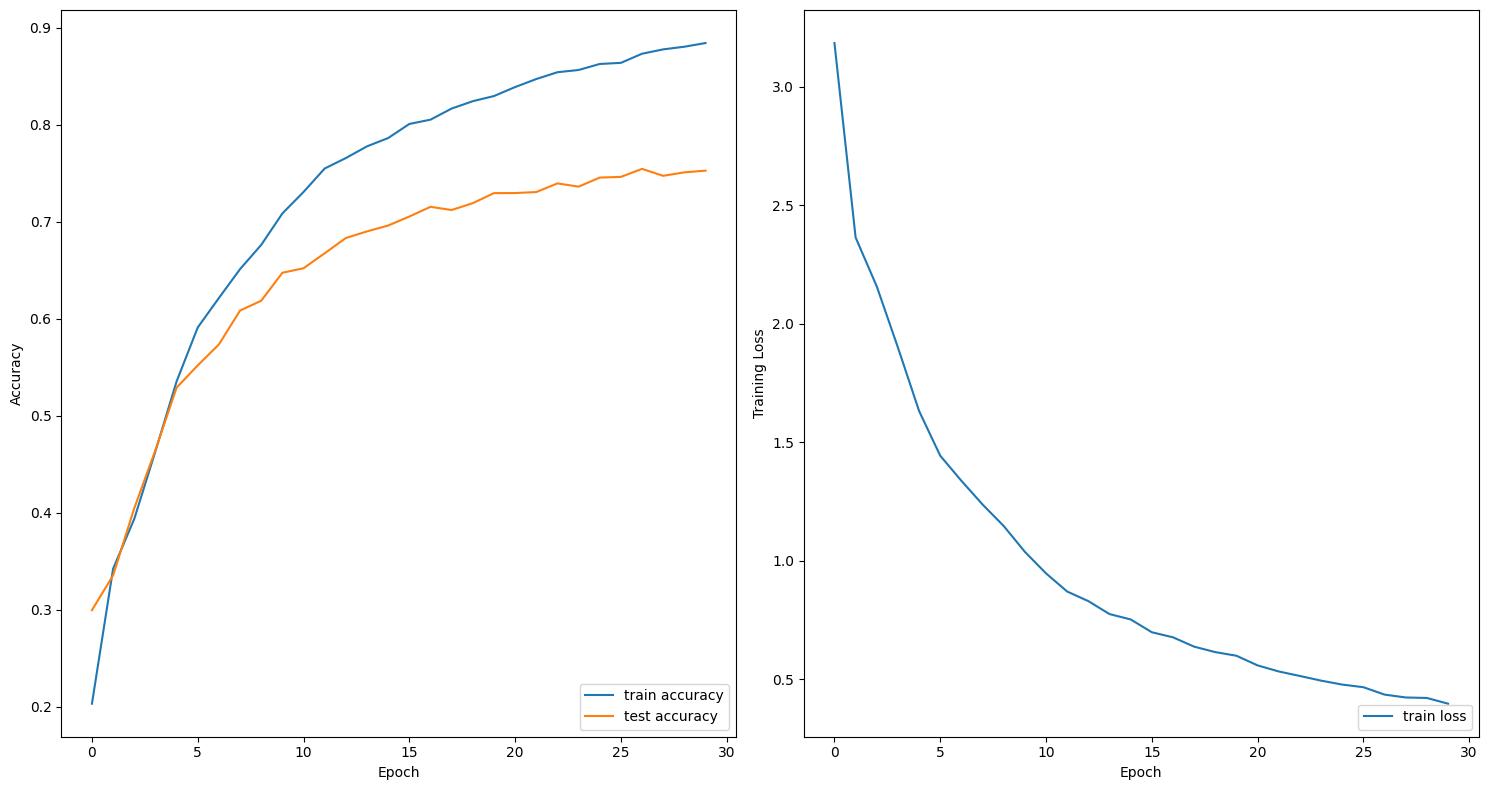

In [ ]:
### COMBINED CNN METHOD ###

db_train.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train = DataLoader(db_train, batch_size=64, shuffle=True, drop_last=True)
loader_test = DataLoader(db_test, batch_size=64, shuffle=False)
model = model.to(device).float()
init_weights(model)
hist_tr_loss, hist_tr_acc, hist_te_acc = fit(model, loader_train, loader_test, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc, label='train accuracy')
plt.plot(hist_te_acc, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc = eval(model, loader_test)
print(f'Test accuracy: {acc*100:.2f}%')

100%|██████████| 17/17 [00:00<00:00, 220.55it/s]


EN CNN Test accuracy: 86.86%


100%|██████████| 21/21 [00:00<00:00, 237.38it/s]


AR CNN Test accuracy: 70.65%


100%|██████████| 34/34 [00:00<00:00, 215.73it/s]


RN CNN Test accuracy: 69.24%


  0%|          | 0/70 [00:00<?, ?it/s]<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
100%|██████████| 70/70 [00:00<00:00, 193.01it/s]


Combined CNN Test accuracy: 74.79%


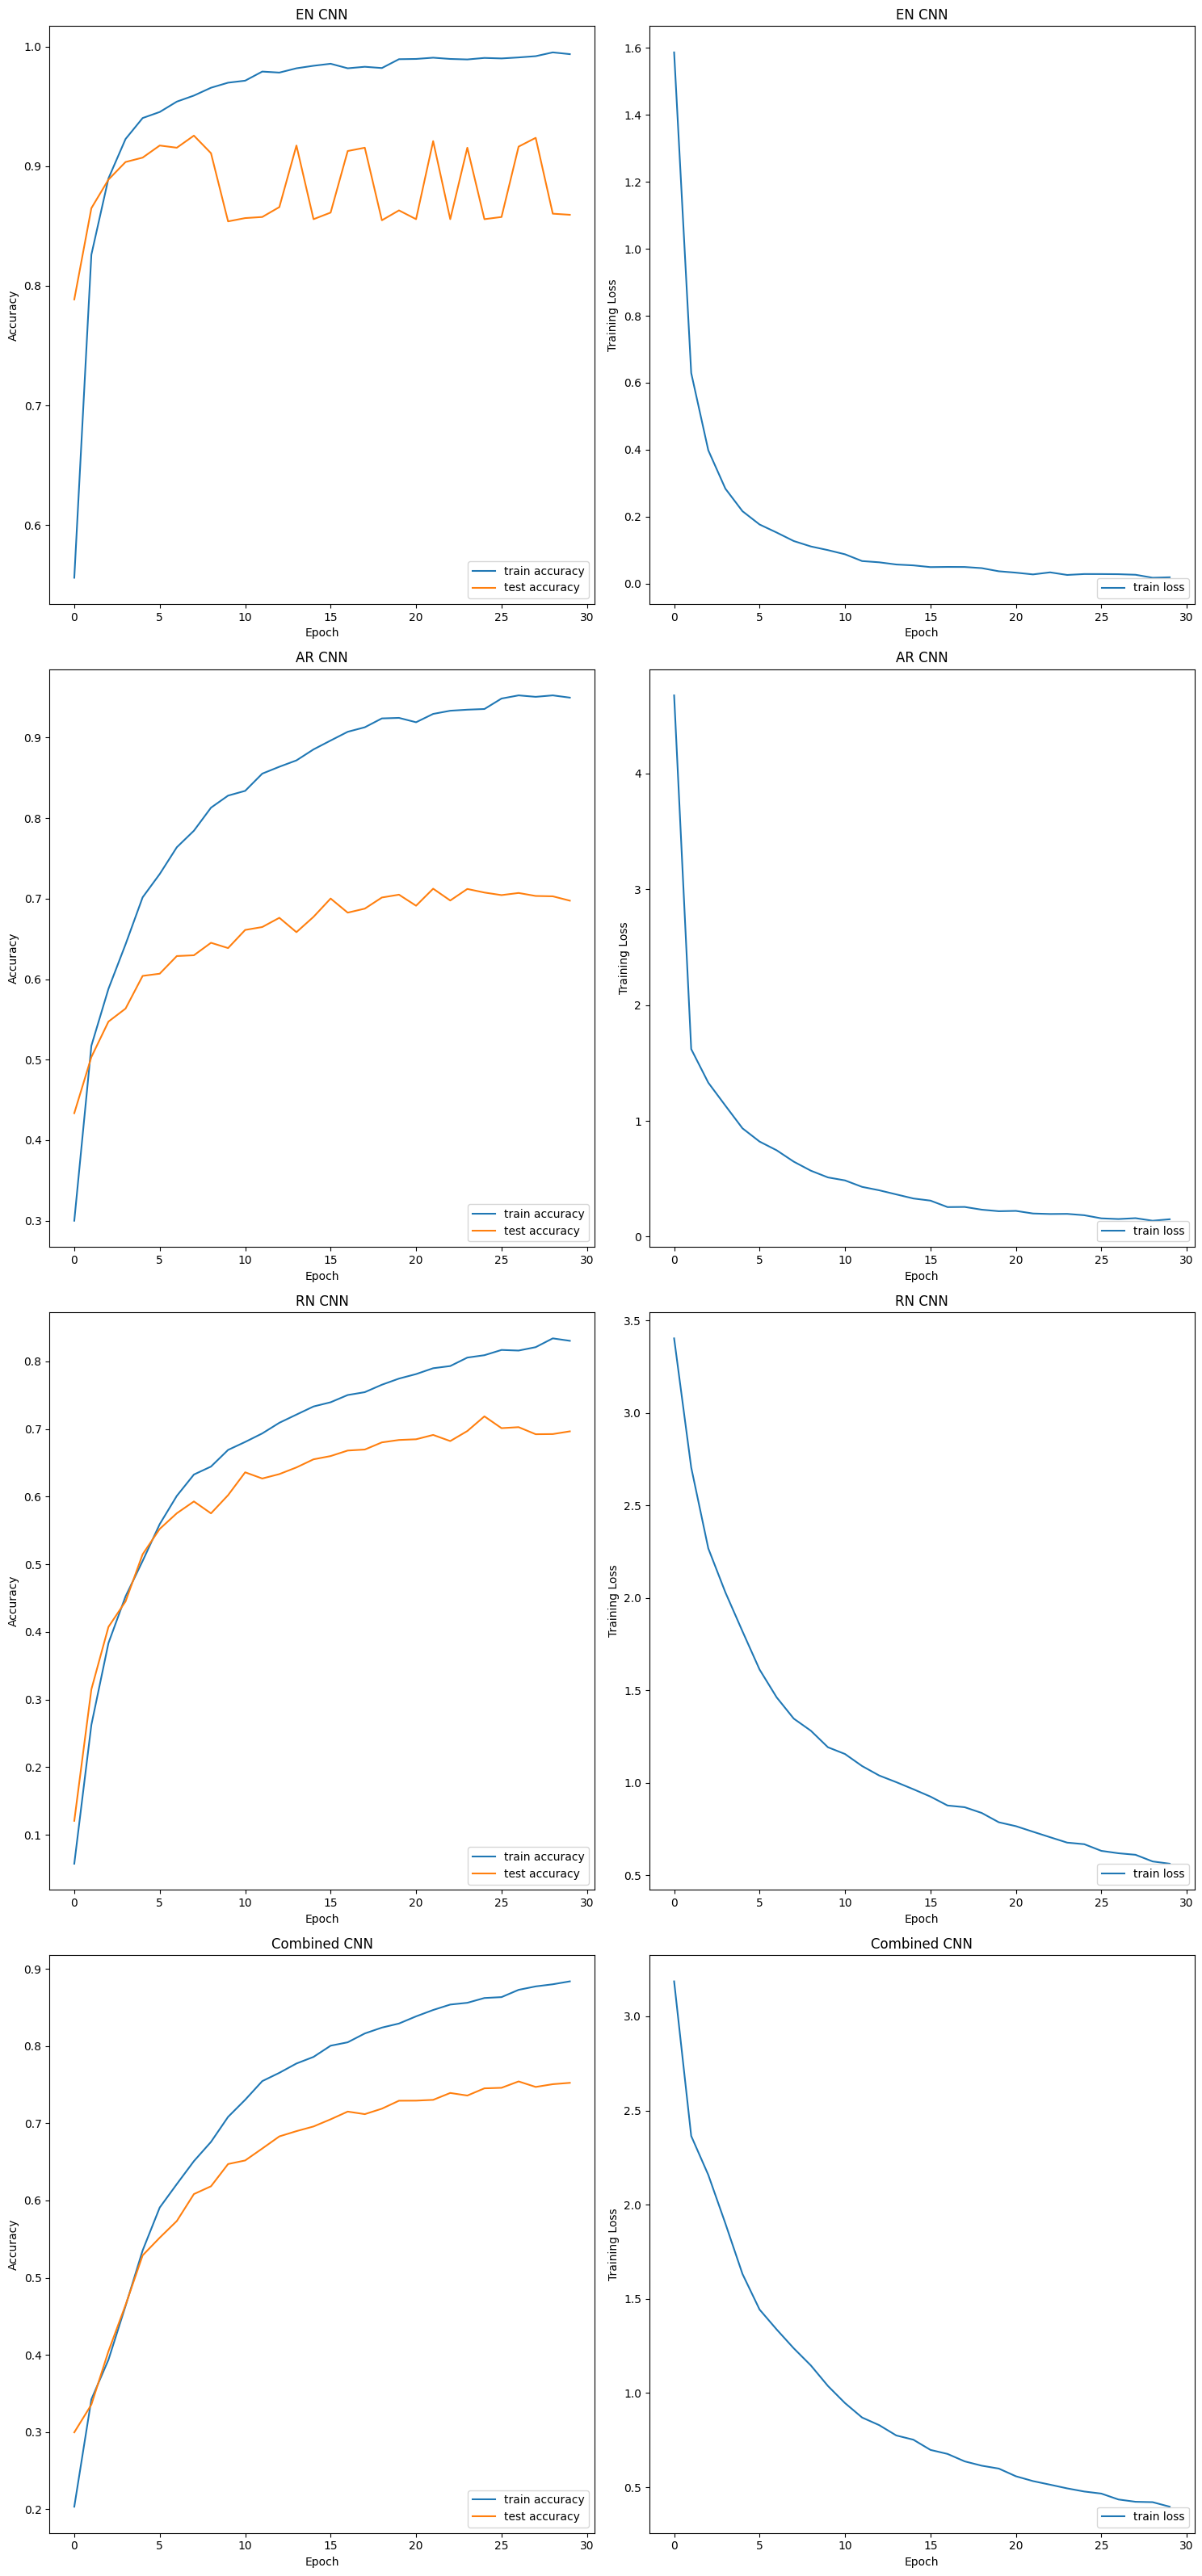

In [ ]:
plt.figure(figsize=(15,32))

### SEPERATE ENSEMBLE CNN METHOD ###

# en
plt.subplot(4, 2, 1)
plt.plot(hist_tr_acc_en, label='train accuracy')
plt.plot(hist_te_acc_en, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('EN CNN')

plt.subplot(4, 2, 2)
plt.plot(hist_tr_loss_en, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('EN CNN')

# ar
plt.subplot(4, 2, 3)
plt.plot(hist_tr_acc_ar, label='train accuracy')
plt.plot(hist_te_acc_ar, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('AR CNN')

plt.subplot(4, 2, 4)
plt.plot(hist_tr_loss_ar, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('AR CNN')

# rn
plt.subplot(4, 2, 5)
plt.plot(hist_tr_acc_rn, label='train accuracy')
plt.plot(hist_te_acc_rn, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('RN CNN')

plt.subplot(4, 2, 6)
plt.plot(hist_tr_loss_rn, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('RN CNN')

### COMBINED CNN METHOD ###

plt.subplot(4, 2, 7)
plt.plot(hist_tr_acc, label='train accuracy')
plt.plot(hist_te_acc, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Combined CNN')

plt.subplot(4, 2, 8)
plt.plot(hist_tr_loss, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('Combined CNN')


plt.tight_layout()

# accuracy

# en
acc = eval(model_en, loader_test_en)
print(f'EN CNN Test accuracy: {acc*100:.2f}%')

# ar
acc = eval(model_ar, loader_test_ar)
print(f'AR CNN Test accuracy: {acc*100:.2f}%')

# rn
acc = eval(model_rn, loader_test_rn)
print(f'RN CNN Test accuracy: {acc*100:.2f}%')

# combined
acc = eval(model, loader_test)
print(f'Combined CNN Test accuracy: {acc*100:.2f}%')

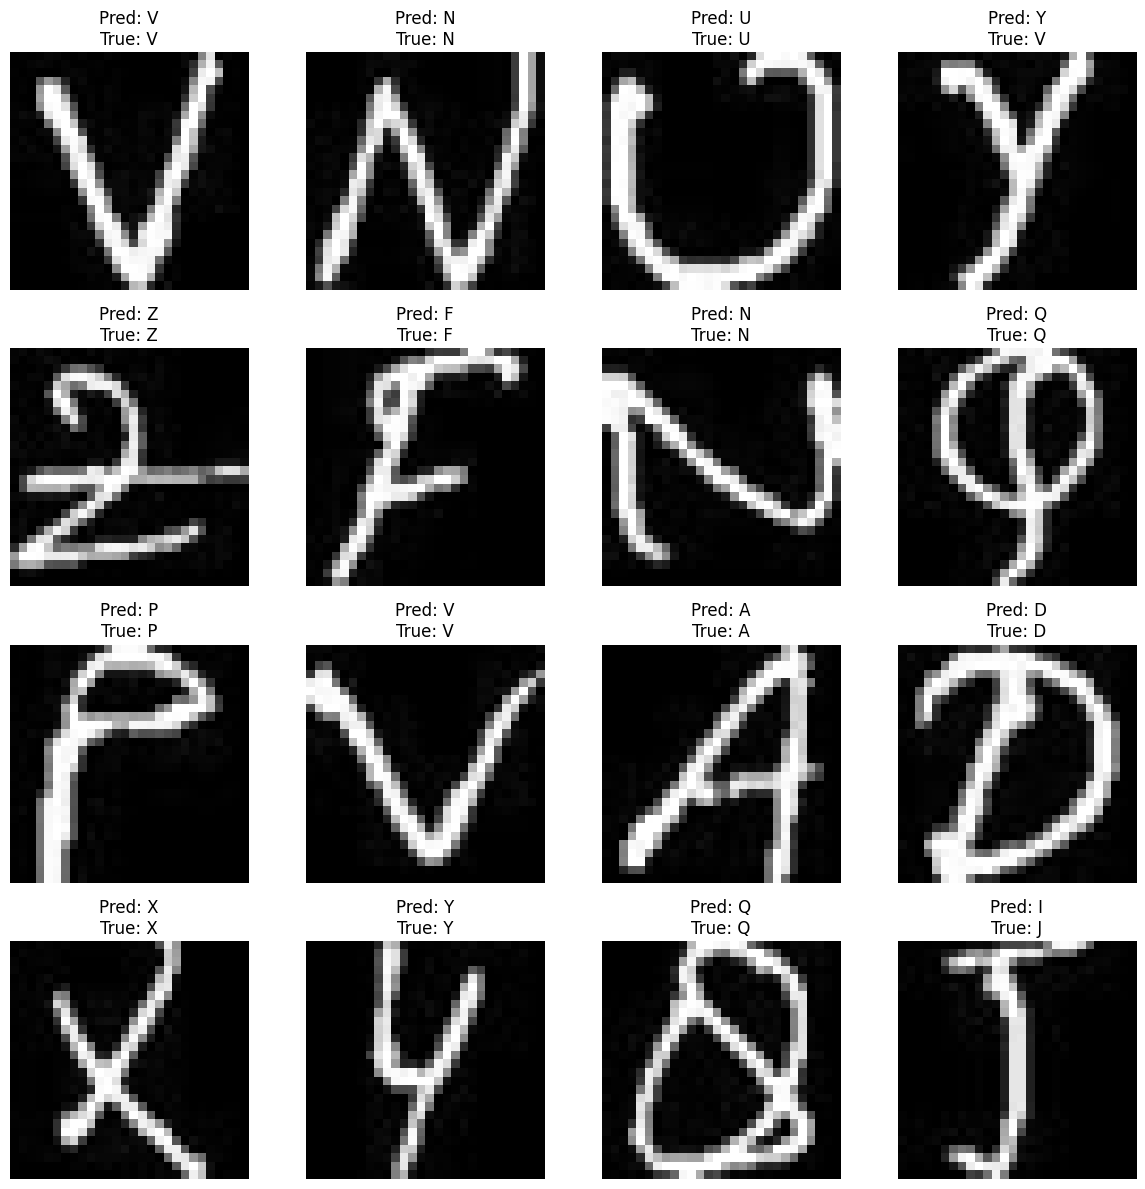

In [ ]:
import matplotlib.pyplot as plt

# Function to show images, predictions, and true labels
def show_predictions(loader, model, classes, num_images=16, rows=4, cols=4):
    # Set model to evaluation mode
    model.eval()

    # Get a batch of images and labels from the loader
    images, labels = next(iter(loader))

    # Move images to the same device as the model
    images = images.to(device)

    # Make predictions
    preds = model(images)
    preds = torch.argmax(preds, dim=1)

    # Move images and labels back to CPU for visualization
    images = images.cpu()
    labels = labels.cpu()
    preds = preds.cpu()

    # Create a figure to display the images
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

    for i in range(num_images):
        ax = axes[i // cols, i % cols]
        img = images[i].permute(1, 2, 0)  # Change (C, H, W) to (H, W, C) for displaying

        # Display the image
        ax.imshow(img.squeeze(), cmap='gray')  # Remove the channel dimension if it's 1

        # Set the title of the subplot to the predicted and true labels
        ax.set_title(f'Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}')

        # Hide the axes
        ax.axis('off')

    # Adjust subplot parameters for a clean layout
    plt.tight_layout()
    plt.show()

# Define the class names (assuming they are letters A-Z)
class_names_en = [chr(i) for i in range(65, 65 + en_num_classes)]

# Call the function to show the predictions
show_predictions(loader_test_en, model_en, class_names_en, num_images=16, rows=4, cols=4)